# Exercise 4 - Solutions



### 1 Minimize and Maximize
#### a) Maximum Likelihood

From the lecture slides we have the log-likelihood:
$$
\log P(y\mid p)=m\log p+(n-m)\log(1-p).
$$

Differentiating with respect to $p$ and setting the FOC equal to $0$ yields:

$$
\frac{\partial \log P(y\mid p)}{\partial p} = \frac{m}{p} - \frac{n-m}{1-p} = 0 \\
= \frac{m(1-p)+pm-np}{p(1-p)}=0\\
= m-np=0\\
p=\frac{m}{n}
$$

Given that $m$ is the number of times that $y=1$, we can also write $m=\sum_{i=1}^n y_i$. Thus:
$$
p=\frac{m}{n} = \frac{1}{n}\sum_{i=1}^n y_i = \bar{y}
$$

#### b) Least Squares

The objective function to be minimized is given by:
 
 $$
 \sum_{i=1}^{n}(y_{i}-m)^{2}
 $$
 
 Again, taking derivatives w.r.t. $m$ and setting the FOC equal to $0$ yields:
 
 $$
 -2\sum_{i=1}^{n}(y_{i}-m) = 0
 $$
 
 This gives:
 $$
 \sum_{i=1}^{n}y_{i}-nm = 0
 $$
 
 which in turn yields:
 $$
 m = \frac{1}{n}\sum_{i=1}^{n}y_{i} = \bar{y} 
 $$
 
 #### c) Log Score
 
 Our objective function is now given by
 
 $$
 \sum_{i=1}^{n}-y_{i}\log m-(1-y_{i})\log(1-m)
 $$
 
 As before, we take the derivative w.r.t. $m$ and set the resulting FOC equal to $0$. 
 
 $$ 
 \sum_{i=1}^{n}\left(-\frac{y_{i}}{m}+\frac{1-y_i}{1-m}\right) = 0 \\
 \sum_{i=1}^{n}\left(-\frac{y_{i}(1-m)}{m(1-m)}+\frac{(1-y_i)m}{m(1-m)}\right) = 0\\
 \sum_{i=1}^{n}\left(-y_{i}(1-m)+(1-y_i)m\right) = 0\\
 \sum_{i=1}^{n}\left(-y_{i}+m\right) = 0\\
 \sum_{i=1}^{n}-y_{i}+nm = 0\\
 m = \frac{1}{n}\sum_{i=1}^{n}y_{i} = \bar{y}
 $$
 
 
 

### 2 Using Logistic Regression

#### a) Download data

First, import the necessary libraries.

In [1]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# set a figure size default
plt.rcParams["figure.figsize"] = [10,8]

With the data downloaded, we can read it in using `pandas`.

In [2]:
# download the data
data = pd.read_excel('hurricanes.xlsx')

# drop the "Name column"
data = data.drop("Name", axis=1)

# display the first couple of rows
data.head()

,RowNames,Number,Year,Type,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt
0,1,430,1944,1,30.2,-76.1,32.1,-74.8,35.1,-69.2,80
1,2,432,1944,0,25.6,-74.9,31.0,-78.1,32.6,-78.2,80
2,3,433,1944,0,14.2,-65.2,16.6,-72.2,20.6,-88.5,105
3,4,436,1944,0,20.8,-58.0,26.3,-72.3,42.1,-71.5,120
4,5,437,1944,0,20.0,-84.2,20.6,-84.9,19.1,-93.9,70


Plot the data using `seaborn.pairplot`.

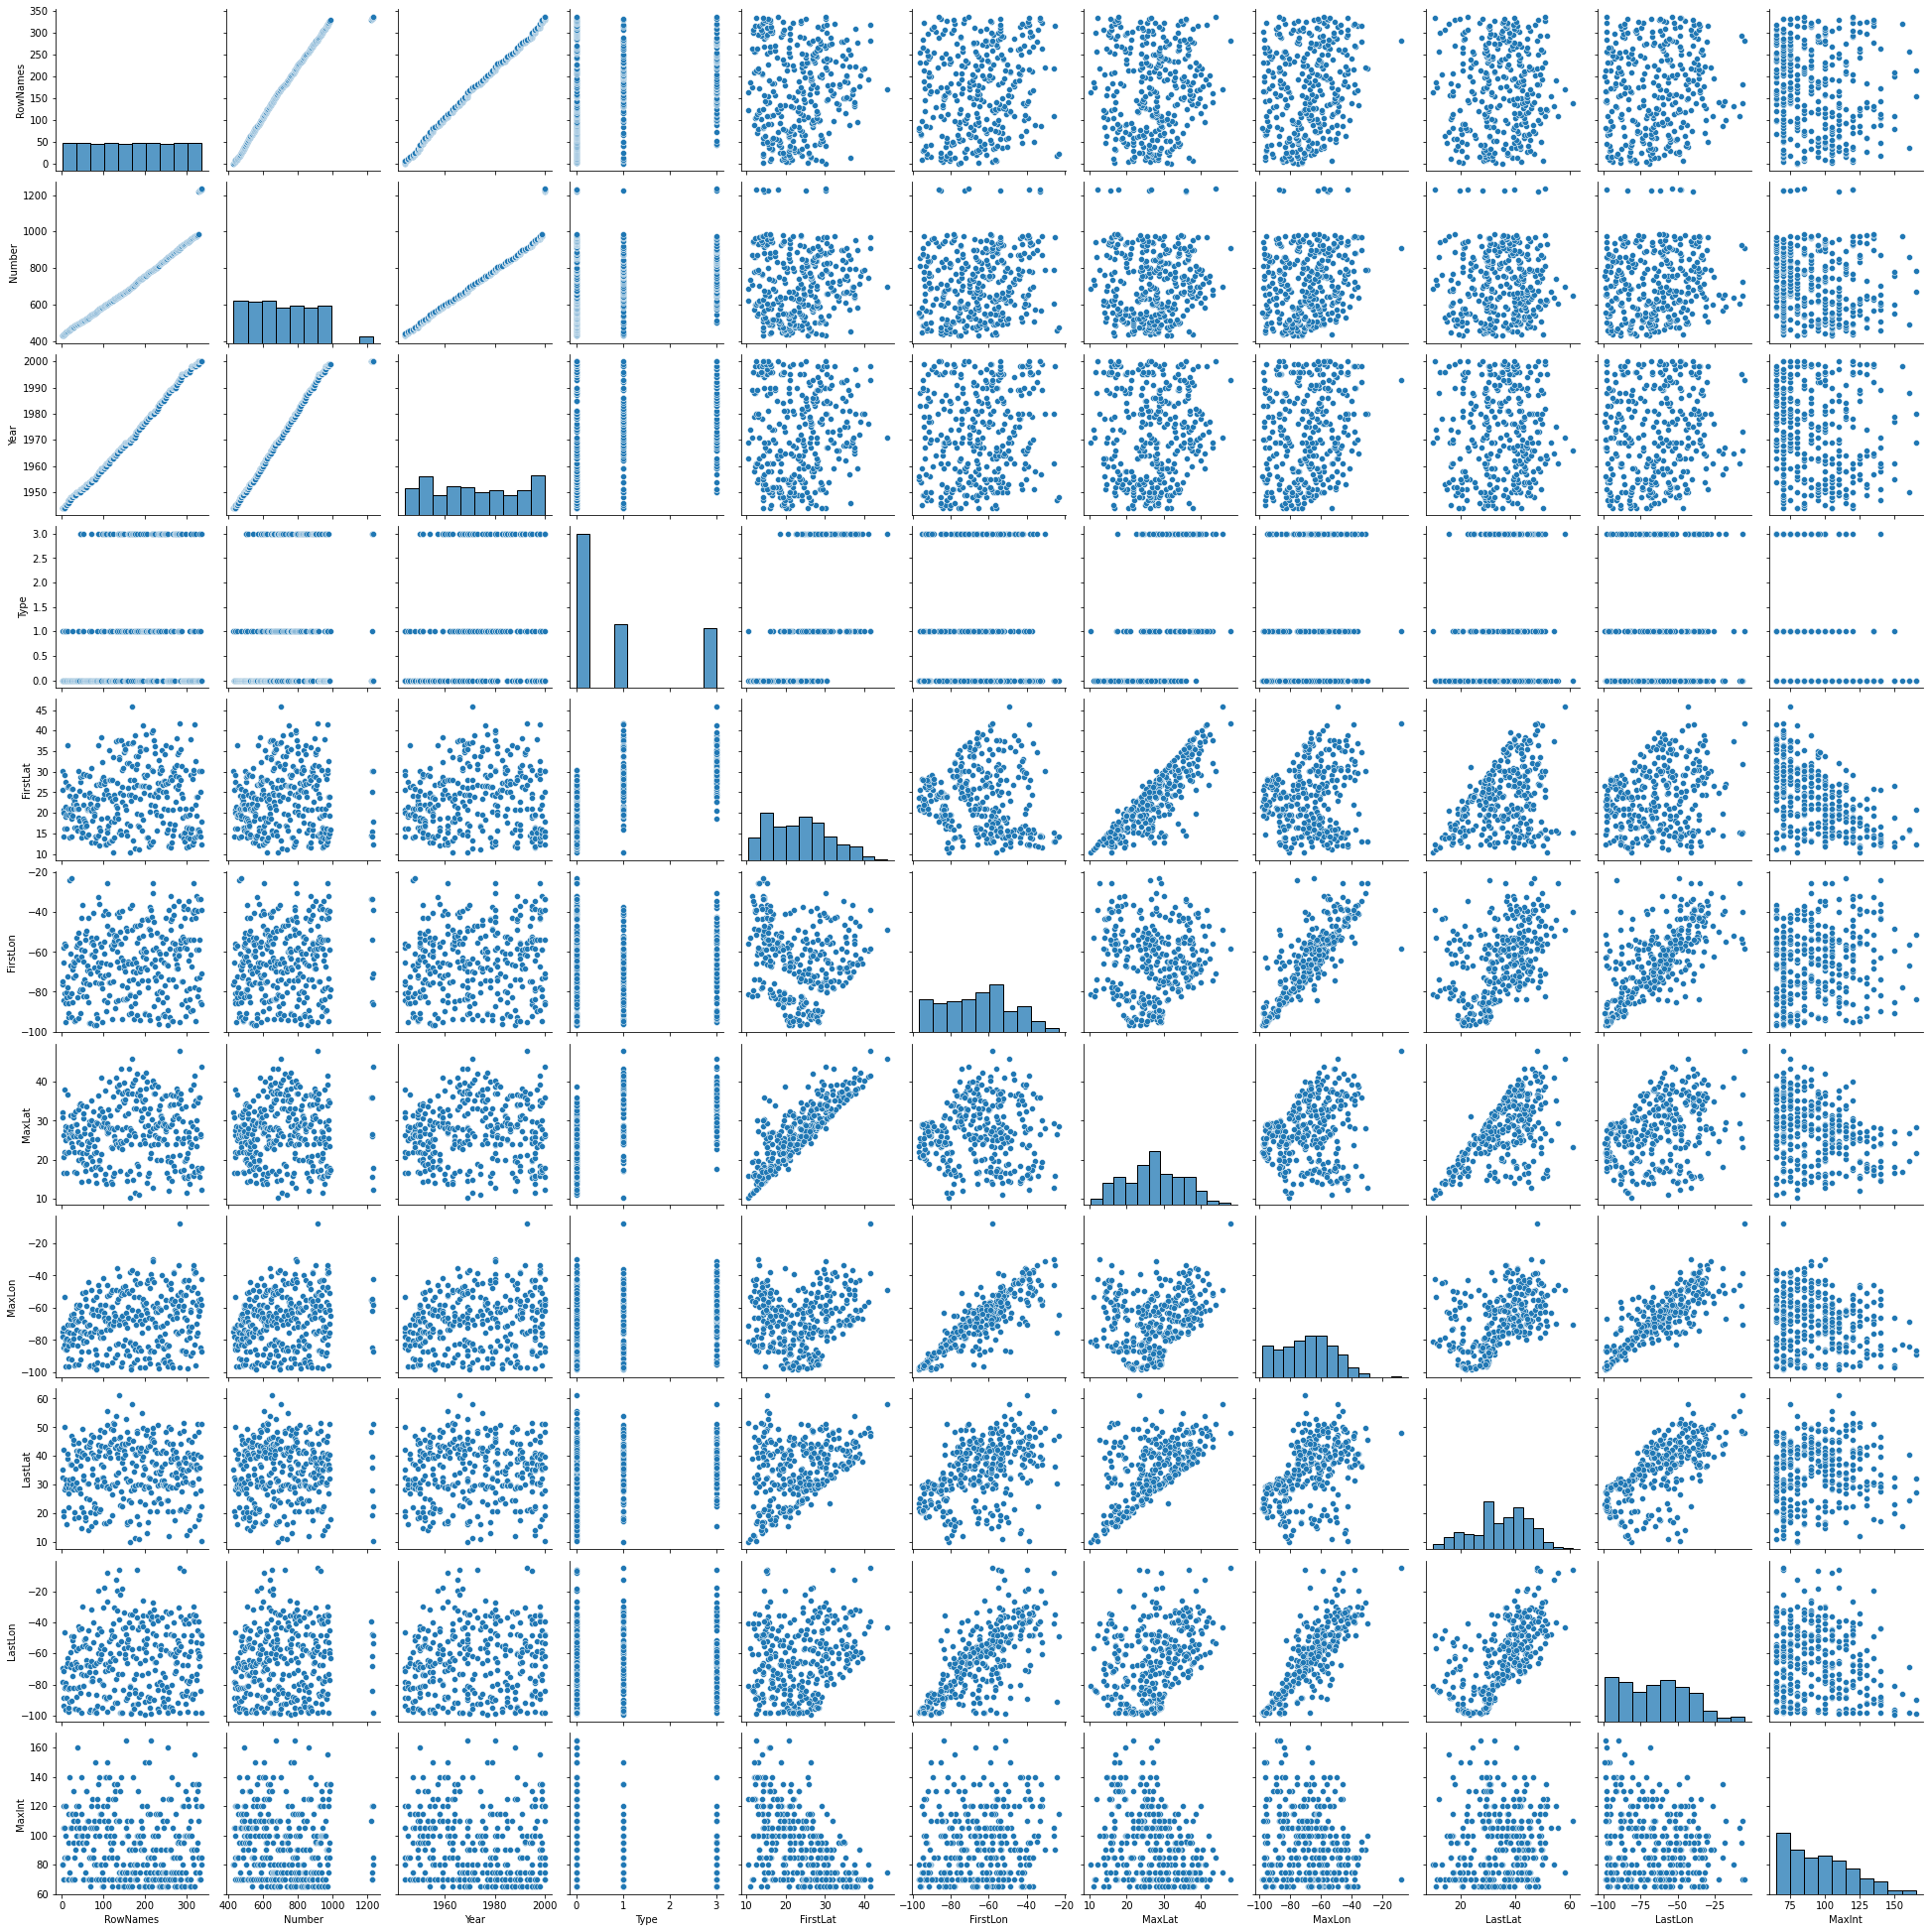

In [3]:
# plot the data 
sns.pairplot(data)

Now, compute the correlation matrix.

In [4]:
# compute the correlation matrix
correl = data.corr()
correl

,RowNames,Number,Year,Type,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt
RowNames,1.000000,0.979911,0.998707,0.204543,0.066320,0.147655,0.040095,0.208582,0.023992,0.118405,-0.110869
Number,0.979911,1.000000,0.979107,0.180796,0.040343,0.147880,0.030310,0.202266,0.011252,0.109275,-0.104030
Year,0.998707,0.979107,1.000000,0.194502,0.061686,0.146470,0.036905,0.203846,0.023999,0.112338,-0.108181
Type,0.204543,0.180796,0.194502,1.000000,0.662654,-0.067350,0.525167,0.154305,0.159709,0.153903,-0.413241
FirstLat,0.066320,0.040343,0.061686,0.662654,1.000000,-0.136393,0.854849,0.163005,0.369432,0.216586,-0.530203
FirstLon,0.147655,0.147880,0.146470,-0.067350,-0.136393,1.000000,0.018821,0.849398,0.450712,0.712697,0.133285
MaxLat,0.040095,0.030310,0.036905,0.525167,0.854849,0.018821,1.000000,0.223451,0.604356,0.351265,-0.295264
MaxLon,0.208582,0.202266,0.203846,0.154305,0.163005,0.849398,0.223451,1.000000,0.477417,0.849161,-0.158521
LastLat,0.023992,0.011252,0.023999,0.159709,0.369432,0.450712,0.604356,0.477417,1.000000,0.669348,0.071727
LastLon,0.118405,0.109275,0.112338,0.153903,0.216586,0.712697,0.351265,0.849161,0.669348,1.000000,-0.156770


Variables like "RowNames", "Number", and "Year" are e.g. highly correlated. This is by construction, as the total number of hurricanes increases naturally over times. In addition, "RowNames" and "Year" should reflect roughly the same information. In addition, one should not calculate correlations for categorical variables. 

#### b) Correlation Plot


First, we set up the `mask`. Here I follow this [guide](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e).

In [5]:
# generate the mask
mask = np.triu(np.ones_like(correl))
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

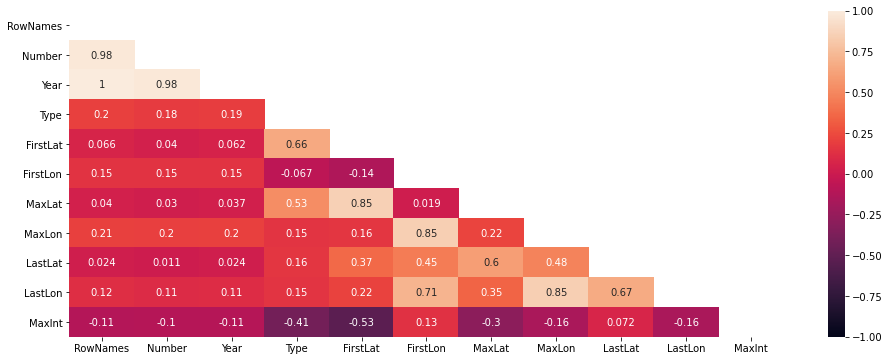

In [6]:
# plot the correlation heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correl, mask=mask, vmin=-1, vmax=1, annot=True)

#### c) Fitting a logistic regression
To create the new column "Type_new", we can first evaluate a logical statement and then convert the result to integers using `int`.

In [7]:
# create the new column "Type_new"
data['Type_new'] = (data.Type!=0).apply(int)
data

,RowNames,Number,Year,Type,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt,Type_new
0,1,430,1944,1,30.2,-76.1,32.1,-74.8,35.1,-69.2,80,1
1,2,432,1944,0,25.6,-74.9,31.0,-78.1,32.6,-78.2,80,0
2,3,433,1944,0,14.2,-65.2,16.6,-72.2,20.6,-88.5,105,0
3,4,436,1944,0,20.8,-58.0,26.3,-72.3,42.1,-71.5,120,0
4,5,437,1944,0,20.0,-84.2,20.6,-84.9,19.1,-93.9,70,0
...,...,...,...,...,...,...,...,...,...,...,...,...
332,333,1227,2000,1,25.2,-85.4,26.1,-84.9,28.0,-83.8,70,1
333,334,1229,2000,0,14.3,-33.2,26.6,-54.2,39.7,-47.9,120,0
334,335,1230,2000,0,12.4,-38.8,12.2,-42.5,10.5,-48.6,80,0
335,336,1231,2000,0,17.9,-86.4,17.9,-87.2,22.6,-97.9,120,0


We can now plot the logistic regression.

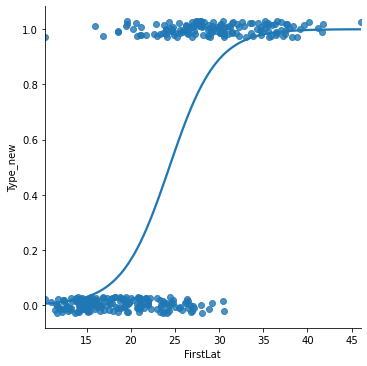

In [8]:
# plot the logistic regression using seaborn
sns.lmplot(x="FirstLat", y="Type_new", data=data, y_jitter = .03, logistic = True, ci = None)
plt.show()

#### d) Finding $R^2$

To answer this question, we can recycle codes from the lecture slides. 

In [9]:
# import the necessary packages
import statsmodels.formula.api as smf
import statsmodels.api as sm

# fit the logistic and the probit regression model
probit_fit = smf.probit("Type_new ~ FirstLat", data = data).fit()
logistic_fit = smf.glm("Type_new ~ FirstLat", data = data).fit()

# create a function to compute McFadden's R^2
def rsq_mcfadden(fit):
    lower = fit.llnull
    upper = fit.llf
    return 1 - upper / lower

# print the results
print('\nProbit:' + str(rsq_mcfadden(probit_fit)), '\nLogistic:' + str(rsq_mcfadden(logistic_fit)))

Optimization terminated successfully.
         Current function value: 0.346346
         Iterations 7

Probit:0.4959357926197784 
Logistic:0.6050633424873588


As we can see, the logistic regression model fits better. 

#### e) Finding other predictors

As suggested by the exercise, we can take a look at the correlation matrix. 

In [10]:
# compute the correlation matrix
correl = data.corr()
correl

,RowNames,Number,Year,Type,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt,Type_new
RowNames,1.000000,0.979911,0.998707,0.204543,0.066320,0.147655,0.040095,0.208582,0.023992,0.118405,-0.110869,0.196709
Number,0.979911,1.000000,0.979107,0.180796,0.040343,0.147880,0.030310,0.202266,0.011252,0.109275,-0.104030,0.168277
Year,0.998707,0.979107,1.000000,0.194502,0.061686,0.146470,0.036905,0.203846,0.023999,0.112338,-0.108181,0.185695
Type,0.204543,0.180796,0.194502,1.000000,0.662654,-0.067350,0.525167,0.154305,0.159709,0.153903,-0.413241,0.826908
FirstLat,0.066320,0.040343,0.061686,0.662654,1.000000,-0.136393,0.854849,0.163005,0.369432,0.216586,-0.530203,0.721472
FirstLon,0.147655,0.147880,0.146470,-0.067350,-0.136393,1.000000,0.018821,0.849398,0.450712,0.712697,0.133285,-0.126876
MaxLat,0.040095,0.030310,0.036905,0.525167,0.854849,0.018821,1.000000,0.223451,0.604356,0.351265,-0.295264,0.565476
MaxLon,0.208582,0.202266,0.203846,0.154305,0.163005,0.849398,0.223451,1.000000,0.477417,0.849161,-0.158521,0.130400
LastLat,0.023992,0.011252,0.023999,0.159709,0.369432,0.450712,0.604356,0.477417,1.000000,0.669348,0.071727,0.160946
LastLon,0.118405,0.109275,0.112338,0.153903,0.216586,0.712697,0.351265,0.849161,0.669348,1.000000,-0.156770,0.152861


Given the results, let's also try "MaxLat" and "MaxInt":

In [11]:
# fit the logistic and the probit regression model
probit_fit = smf.probit("Type_new ~ MaxLat", data = data).fit()
logistic_fit = smf.glm("Type_new ~ MaxLat", data = data).fit()

# print the results
print('\nProbit:' + str(rsq_mcfadden(probit_fit)), '\nLogistic:' + str(rsq_mcfadden(logistic_fit)))

Optimization terminated successfully.
         Current function value: 0.500333
         Iterations 6

Probit:0.27182804015871154 
Logistic:0.30714426684525475


In [12]:
# fit the logistic and the probit regression model
probit_fit = smf.probit("Type_new ~ MaxInt", data = data).fit()
logistic_fit = smf.glm("Type_new ~ MaxInt", data = data).fit()

# print the results
print('\nProbit:' + str(rsq_mcfadden(probit_fit)), '\nLogistic:' + str(rsq_mcfadden(logistic_fit)))

Optimization terminated successfully.
         Current function value: 0.566158
         Iterations 5

Probit:0.17602714654942941 
Logistic:0.18504869061907314


As we can see, in both cases the Logistic regression model also seems to fit slightly better. However, both models do not fit as well as with "FirstLat" as a predictor.

### 3 McFadden's $R^2$

#### a) The McFadden's correlation

We can simply adjust our function for computing the McFadden $R^2$, by multiplying the $R^2$ by the sign of the regression coefficient. 

In [13]:
def mcf_corr(y, x):
    
    # create a new dataframe
    data = pd.DataFrame(np.vstack((y.values, x.values)).T, columns = ['y','x'])
    
    # fit the logistic regression
    fit = smf.glm("y ~ x", data = data).fit()
    
    # compute the R2
    lower = fit.llnull
    upper = fit.llf
    return np.sign(fit.params[1])* (1 - upper / lower)

Test the function:

In [14]:
mcf_corr(data.Type_new, data.MaxInt)

-0.18504869061907314

#### b) The McFadden correlation matrix

In [15]:
def mystery(df):
    n_columns = len(df.columns)
    n_rows = n_columns
    correlations = np.empty((n_rows, n_columns))* np.nan
  
    for i in range(n_rows):
        for j in range(n_columns):
            try:
                correlations[i, j] = mcf_corr(df.iloc[:, i], df.iloc[:, j])
            except:
                None

    return correlations

The function computed the "McFadden Correlation" for all variables in the imput DataFrame.

In [16]:
mystery(data)

array([[            nan,  7.32391253e-01,  9.84515417e-01,
         3.62045847e-03,  3.67647510e-04,  1.84882151e-03,
         1.34934796e-04,  3.77135454e-03,  4.92114434e-05,
         1.18004544e-03, -1.03298632e-03,  3.33764979e-03],
       [ 7.06121390e-01,             nan,  6.96836036e-01,
         2.54372623e-03,  1.23991618e-04,  1.68346482e-03,
         7.05234427e-05,  3.21060538e-03,  1.08651720e-05,
         9.10626851e-04, -8.24505555e-04,  2.19394402e-03],
       [ 9.93403076e-01,  8.12433624e-01,             nan,
         4.59661868e-03,  4.48457326e-04,  2.56407208e-03,
         1.61455117e-04,  5.06818361e-03,  6.94247207e-05,
         1.49569136e-03, -1.38592392e-03,  4.17548035e-03],
       [ 1.36563019e-02,  1.05708654e-02,  1.22982319e-02,
                    nan,  2.30316891e-01, -1.43040109e-03,
         1.17032533e-01,  7.63206379e-03,  8.18968489e-03,
         7.59135860e-03, -6.40485769e-02,  5.14578402e-01],
       [ 6.40011945e-04,  2.37787683e-04,  5.5371905

#### c) Fixing the mystery function 

The output of the function is not easily readable. Let's thus reformat it into a DataFrame. 

In [17]:
def mystery(df):
    n_columns = len(df.columns)
    n_rows = n_columns
    correlations = np.empty((n_rows, n_columns))* np.nan
  
    for i in range(n_rows):
        for j in range(n_columns):
            try:
                correlations[i, j] = mcf_corr(df.iloc[:, i], df.iloc[:, j])
            except:
                None
    return pd.DataFrame(correlations, columns=df.columns, index=df.columns)

Let's look at our re-formated output:

In [18]:
mystery(data)

,RowNames,Number,Year,Type,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt,Type_new
RowNames,NaN,0.732391,0.984515,0.003620,0.000368,0.001849,0.000135,0.003771,0.000049,0.001180,-0.001033,0.003338
Number,0.706121,NaN,0.696836,0.002544,0.000124,0.001683,0.000071,0.003211,0.000011,0.000911,-0.000825,0.002194
Year,0.993403,0.812434,NaN,0.004597,0.000448,0.002564,0.000161,0.005068,0.000069,0.001496,-0.001386,0.004175
Type,0.013656,0.010571,0.012298,NaN,0.230317,-0.001430,0.117033,0.007632,0.008190,0.007591,-0.064049,0.514578
FirstLat,0.000640,0.000238,0.000554,0.109778,NaN,-0.002738,0.326050,0.003941,0.022773,0.007103,-0.055950,0.149193
FirstLon,0.002585,0.002593,0.002543,-0.000530,-0.002199,NaN,0.000043,0.260765,0.029454,0.115361,0.002098,-0.001898
MaxLat,0.000234,0.000135,0.000198,0.054243,0.324701,0.000053,NaN,0.007547,0.081239,0.020187,-0.013708,0.066704
MaxLon,0.005329,0.004998,0.005080,0.002859,0.003199,0.263203,0.006157,NaN,0.034440,0.262775,-0.003021,0.002028
LastLat,0.000079,0.000019,0.000079,0.003483,0.020992,0.033786,0.075341,0.039080,NaN,0.104961,0.000690,0.003539
LastLon,0.001568,0.001333,0.001410,0.002675,0.005423,0.109858,0.015493,0.249095,0.087360,NaN,-0.002778,0.002638


### 4 Link Functions



In [19]:
# compute the CologLog and the Cauchy model
mod_cloglog = smf.glm(formula="Type_new ~ FirstLat", data=data, family=sm.families.Binomial(sm.genmod.families.links.cloglog())).fit()
mod_cauchy =smf.glm(formula="Type_new ~ FirstLat", data=data, family=sm.families.Binomial(sm.genmod.families.links.cauchy())).fit()

# print the estimation results
print(mod_cloglog.summary())
print('\n')
print(mod_cauchy.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Type_new   No. Observations:                  337
Model:                            GLM   Df Residuals:                      335
Model Family:                Binomial   Df Model:                            1
Link Function:                cloglog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -115.03
Date:                Thu, 16 Sep 2021   Deviance:                       230.07
Time:                        16:38:19   Pearson chi2:                     310.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9572      0.695    -10.004      0.0

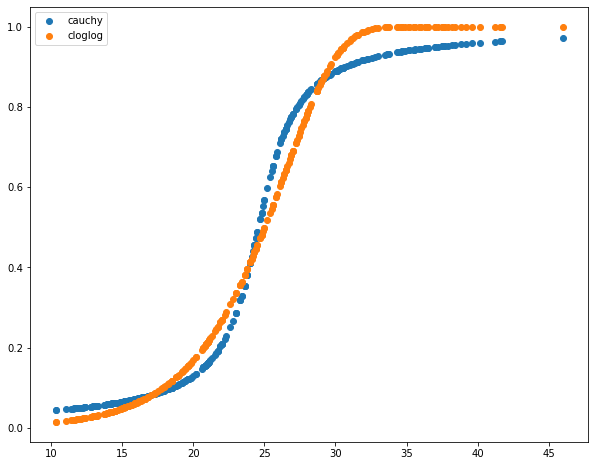

In [20]:
fig, ax = plt.subplots()
ax.scatter(data.FirstLat, mod_cauchy.predict(), label='cauchy')
ax.scatter(data.FirstLat, mod_cloglog.predict(), label='cloglog')
ax.legend()
plt.show()

### 5 Efficiency

#### a) Simulation function

In [21]:
def sim(a, b, x, rng):
    """ 
    Simulates y from the logistic regression model p = F(a + bx). 
    """
    
    # define the logistic function
    logistic = lambda x: 1/(1 + np.exp(-x))
    
    # sample the y values
    n = len(x)
    y = rng.binomial(n = 1, size = n, p = logistic(a + b * x))
  
    return y

#### b) Implementing estimators

Let's implement the three regressions in separate functions. 

In [22]:
def probit(x, y):
    # fit the probit model
    fit = smf.glm(formula="y ~ x", data=pd.DataFrame({'x':x, 'y':y}), family=sm.families.Binomial(sm.genmod.families.links.probit())).fit()
    return fit.params.values

def logit(x, y):
    # fit the logit model
    fit = smf.glm(formula="y ~ x", data=pd.DataFrame({'x':x, 'y':y}), family=sm.families.Binomial()).fit()
    return fit.params.values

def logit_cf(x, y):
    # fit the logistic model with `curve_fit`
    logistic = lambda x, a, b: 1/(1 + np.exp(-(a + b*x)))
    return curve_fit(logistic, x, y)[0]


#### c) Simulate estimates function

The function could for example look like this:

In [23]:
def sim_estimates(estimators, a, b, x, n_reps, rng):
    """
    Simulate n_reps logistic regression models (y). Each time, fit every funtion 
    in estimators to x and y. Return the parameter estimates in a suitable array.
    """

    n_estimators = len(estimators)
    estimates = np.ones((n_reps, 2 * n_estimators))

    for row in range(n_reps):
        y = sim(a, b, x, rng)
        for index, estimator in enumerate(estimators):
            estimates[row, (2*index):(2*index + 2)] = estimator(x, y)
    
    return estimates

#### d) Simulate the variances and mean squared errors

First, we need to call our `sim_estimates` function:

In [24]:
# import curve_fit
from scipy.optimize import curve_fit

# set number of samples
n_reps = 1000

# set a seed for reproducability
rng = np.random.default_rng(seed = 313)

# set x
x = np.linspace(-1, 1, 100)

# call the `sim_estiamtes` function
sims = sim_estimates([logit_cf, logit], 1, 2, x, n_reps, rng)

To compute the RMSE, let's briefly modify our function.

In [25]:
def sim_estimates(estimators, a, b, x, n_reps, rng):
    """
    Simulate n_reps logistic regression models (y). Each time, fit every funtion 
    in estimators to x and y. Return the parameter estimates in a suitable array.
    """

    n_estimators = len(estimators)
    estimates = np.ones((n_reps, 2 * n_estimators))
    RMSE = np.empty([n_reps, n_estimators]) 
    
    for row in range(n_reps):
        y = sim(a, b, x, rng)
        for index, estimator in enumerate(estimators):
            # extract the parameters
            params = estimator(x, y)
            
            # store parametes in the "estimates" array
            estimates[row, (2*index):(2*index + 2)] = params
            
            # compute the RMSE
            RMSE[row, index] = np.mean((y - params[0] - params[1]*x)**2)
            
    return estimates, RMSE

We can now simulate the data and investigate the properties of our different estimators.

In [26]:
sims = sim_estimates([logit_cf, logit, probit], 1, 2, x, n_reps, rng)

Compute the variances:

In [27]:
# compute the variances
var = np.apply_along_axis(func1d = np.var, axis = 0, arr = sims[0])
var

array([0.11130358, 0.45353454, 0.07888749, 0.28141188, 0.02513269,
       0.08838225])

Compute the mean of the RMSEs:

In [28]:
np.mean(sims[1], axis=0)

array([1.62934706, 1.45481827, 0.46167565])

In this case, the probit model seems to perform the best.

#### e) Make histograms of estimates

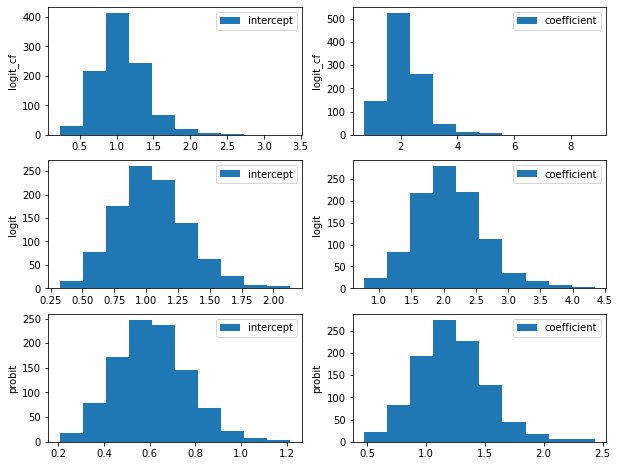

In [29]:
# create plots
fig, ax = plt.subplots(3,2)

# iterate over the results and plot histograms
for i, est in enumerate(['logit_cf', 'logit', 'probit']):
    
    # plot the distributions of the estimates
    ax[i,0].hist(sims[0][:,i*2], label='intercept')
    ax[i,0].legend()
    ax[i,0].set_ylabel(est)
    ax[i,1].hist(sims[0][:,i*2+1], label='coefficient')
    ax[i,1].legend()
    ax[i,1].set_ylabel(est)